In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.png

In [2]:
iris = datasets.load_iris()

In [ ]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


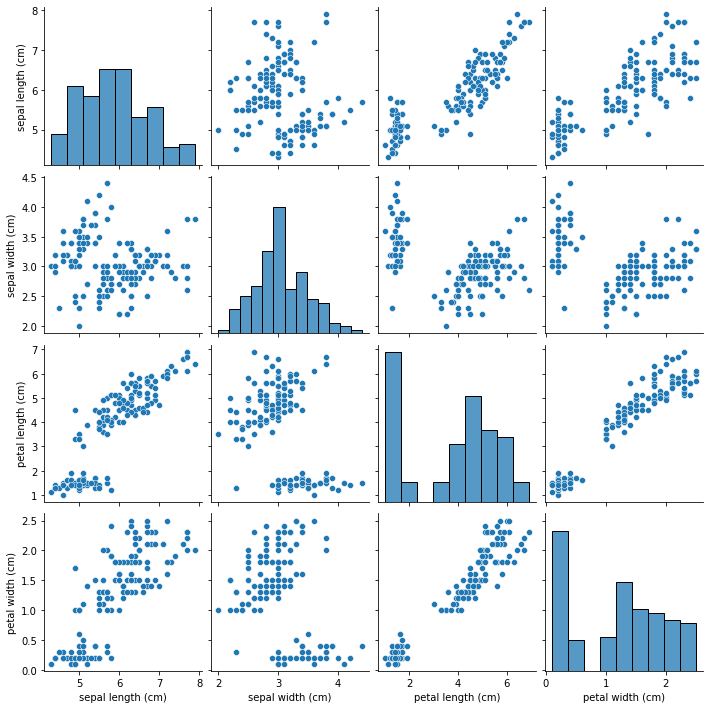

In [7]:
import seaborn as sns
sns.pairplot(df)
plt.show()

Aggiungiamo i targets

In [8]:
targets = pd.Series(iris.target, name='targets')

In [9]:
targets

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: targets, Length: 150, dtype: int64

In [10]:
targets = targets.replace({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]})

In [11]:
df_with_targets = df.join(targets)
display(df_with_targets)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targets
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


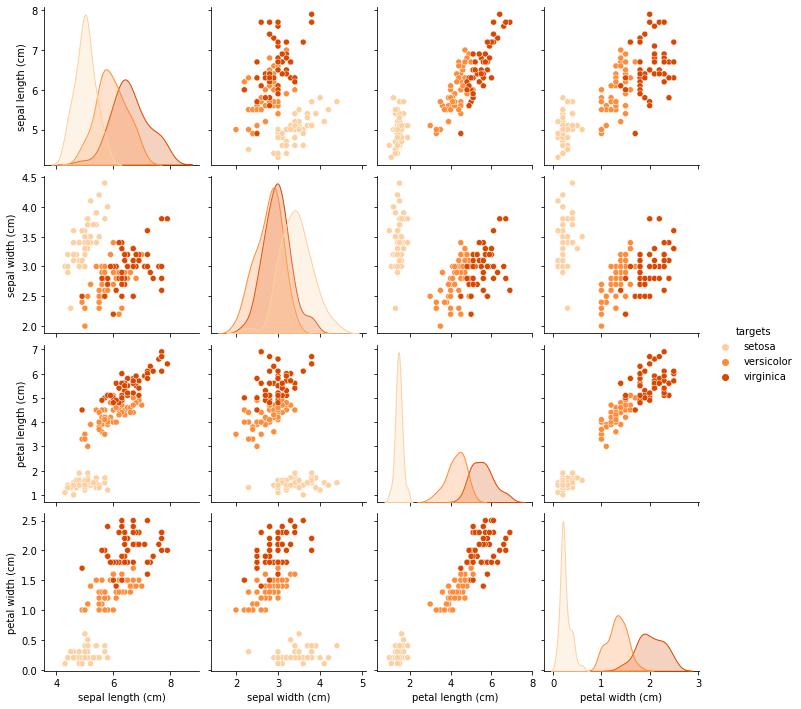

In [13]:
#hue colora i dati a seconda della colonna
sns.pairplot(df_with_targets, hue='targets', palette='Oranges')
plt.show()

# K-MEANS

Il train_test_split per il clustering è un argomento discusso. Non avendo un target in un certo senso non avremmo modo di valutare la bontà del modello, e quindi di valutare un possibile overfitting, quindi sembrerebbe non necessario. Allo stesso tempo di fatto ci troviamo sempre a valutare un algoritmo di clustering utilizzando metriche specifiche (come l'inerzia e il sihlouette score) valutate sul set di dati su cui abbiamo fittato il modello. Quindi le scelte che facciamo sul modello (per esempio il numero di cluster) sono di fatto guidate da queste metriche, e possono essere soggette a overfitting. Una possibile soluzione è come sempre fare una crosso validation. Ad ogni modo per i nostri scopi attuali non ci preoccuperemo di questo e useremo tutto il set di dati.

In [14]:
X = df[['sepal length (cm)', 'petal width (cm)']].copy()

In [15]:
from sklearn.cluster import KMeans

model = KMeans(random_state=22)
model.fit(X)

KMeans(random_state=22)

In [ ]:
model.get_params()

In [ ]:
model.cluster_centers_

In [ ]:
### parametri che ha utilizzato il modello in automatico
model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In questo caso l'algoritmo individua in automatico 8 cluster, in cui centro vengono individuati in questi punti (in questo caso abbiamo 2 features, quindi i centri saranno punti in uno spazio a 2 dimensioni):

In [ ]:
### centri dei cluster
model.cluster_centers_

array([[5.23      , 0.28      ],
       [6.74166667, 1.525     ],
       [5.476     , 1.224     ],
       [7.5       , 2.09090909],
       [6.00625   , 1.85625   ],
       [4.67      , 0.195     ],
       [6.16470588, 1.39411765],
       [6.57894737, 2.22631579]])

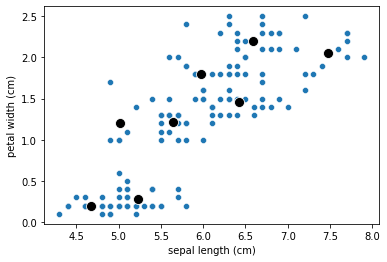

In [18]:
sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', data=X)
sns.scatterplot(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], color='k', s=100)
plt.show()

Volendo però possiamo anche specificare il numero di cluster nell'inizializzazione del modello:

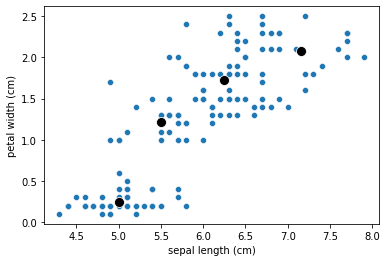

In [19]:
model = KMeans(n_clusters=4, random_state=22)
model.fit(X)
sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', data=X)
sns.scatterplot(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], color='k', s=100)
plt.show()

Se voglio vedere a quali cluster il modello assegna ogni punto, mi basta fare farmi printare model.labels_ (NB. ovviamente non è detto che corrispondano a quelle di IRIS, in quanto qui non stiamo cercando di predire una specifica specie, ma di dividere le specie tra loro)

In [20]:
print(model.labels_)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 2 0 1 2 1 2 1 2 1 1 2 1 2 1 2 1 1 2 1 2 2 2 2
 2 2 2 2 2 1 1 1 1 2 1 2 2 2 1 1 1 2 1 1 1 1 1 2 1 1 2 2 0 2 2 0 1 0 2 0 2
 2 0 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 0 0 0 2 2 2 0 2 2 2 0 0 0 2 0 0 0 2 2
 2 2]


In [21]:
labels = pd.Series(model.labels_, index=X.index, name='labels')
labels_df = X.join(labels)
display(labels_df)

,sepal length (cm),petal width (cm),labels
0,5.1,0.2,3
1,4.9,0.2,3
2,4.7,0.2,3
3,4.6,0.2,3
4,5.0,0.2,3
...,...,...,...
145,6.7,2.3,0
146,6.3,1.9,2
147,6.5,2.0,2
148,6.2,2.3,2


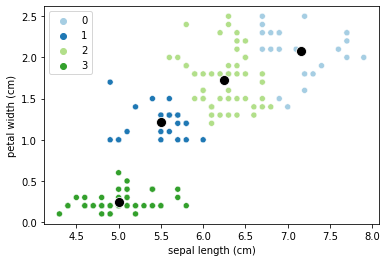

In [22]:
sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', hue='labels', data=labels_df, palette='Paired')
sns.scatterplot(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], color='k', s=100)
plt.show()

# METRICHE DI VALUTAZIONE

Possiamo chiederci quanto bene il nostro modello stia clusterizzando i dati. Ricordiamoci che anche se in questo in teoria caso avremmo i target (cioè sappiamo a che fiore corrisponde ogni sample), solitamente non li abbiamo a disposizione. Dobbiamo quindi usare metriche indipendenti dai target.

## INERTIA

In [23]:
### centri dei cluster  compattenzza del cluster, più piccola è meglio è , riguarda il singolo cluster
#più aumento i cluster e più aumenta l'inerzia
#
model.inertia_

24.69231507639845

L'inerzia è una misura della 'compattezza' dei vari cluster. Si calcola sulla base delle distanze di ogni dato dal centro del suo cluster. E' da tenere in mente che all'aumentare del numero di cluster l'inertia diminuirà sempre. In generale infatti in un insieme con 2 cluster le distanze dei punti dai centri sarà più alta di come sarebbe se dividessimo l'insime con 20 cluster, in quanto i punti sarebbero mediamente più vicini ai propri centri. Si tratta qui di trovare un compromesso tra numero di cluster e inertia. In generale si usa il metodo 'elbow' (gomito), per cui si plotta l'inertia per ogni numero di cluster, e si sceglie quello in cui la linea di inerzia si piega, cominciando a scendere in modo più lento (intuitivamente significa che la compatezza dei cluster non aumenterebbe in modo significativo aumentando ancora il numero di cluster)

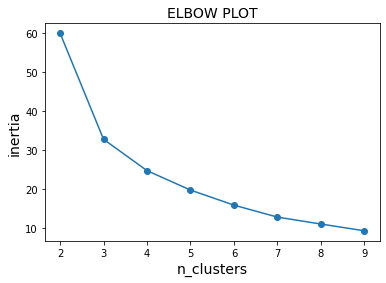

In [25]:
#si plotta l'inerzia per  ogni valore di k , per scegliere il valore migliore
inertia_list = list()
for n in range(2, 10):
    model = KMeans(n_clusters=n)
    model.fit(X)
    inertia_list += [model.inertia_]

plt.scatter(range(2, 10), inertia_list)
plt.plot(range(2, 10), inertia_list)
plt.title('ELBOW PLOT', fontsize=14)
plt.xlabel('n_clusters', fontsize=14)
plt.ylabel('inertia', fontsize=14)
plt.show()


In realta esiste una libreria molto molto comoda per valutare i modelli di clustering, e generare plot tipici come l'Elbow plot: yellobrick. Il visualizer di yellobrick funziona come un vero e proprio modello, quindi bisogna dargli un range per il parametro k e fittarlo sui dati

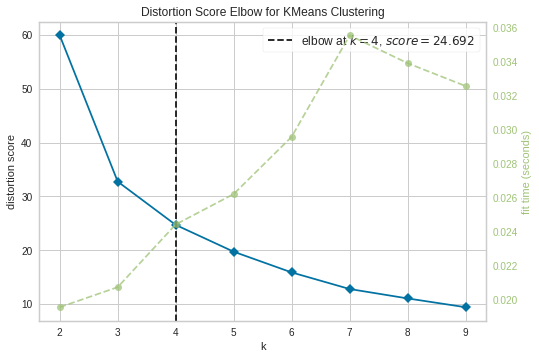

In [30]:
from yellowbrick.cluster import KElbowVisualizer #comando dper fare direttamente l'elbow plot

visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In questo caso individua l'elbow a k=4. Noi sappiamo già che il k giusto sarebbe 3, in quanto sappiamo che i tipi di fiori sono 3

## SILHOUETTE SCORE

Il Silhoutte Score va da -1 a 1, dove:
1 significa che abbiamo cluster ben divisi e coerenti

*   1 significa che abbiamo cluster ben divisi e coerenti
*   0 significa che i cluster non sono ben distinguibili tra loro
*   -1 significa che abbiamo probabilmente delle mis-classificazioni

A differenza dell'inerzia (che usa la distanza dai centri dei cluster), è calcolato utilizzando sia la distanza **intra-cluster** (cioè la distanza di un sample dagli altri samples dello stesso cluster), sia la distanza **inter-cluster** (cioè la distanza di un sample dai cluster cui non appartiene). Quindi ci dà un informazione diversa dall'inerzia, che tiene conto anche delle relazioni tra i diversi cluster.

In [31]:
from sklearn.metrics import silhouette_score

for n in range(2,7):

    model = KMeans(n_clusters=n)
    model.fit(X)
    labels = model.labels_
    print('Avg Sihlouette Score (k={}): {} '.format(n,silhouette_score(X, labels)))


Avg Sihlouette Score (k=2): 0.5645716498947053 
Avg Sihlouette Score (k=3): 0.503090546149075 
Avg Sihlouette Score (k=4): 0.4634141452435154 
Avg Sihlouette Score (k=5): 0.47391474154300983 
Avg Sihlouette Score (k=6): 0.4133791284895426 


Si può generare un grafico del Silhouette Score (sempre con yellowbrick), dove ogni cluster è identificato da un colore, e la forma della figura che lo rappresenta sono gli score calcolati per ogni punto del cluster, e ordinati in modo crescente (sull'asse x ho proprio il valore degli Score). La linea tratteggiata è la media di tutti i Sihlouette Score di ogni sample ( che poi è il vero e proprio sihloutte_score sintetico che fornisce anche sklearn)


Avg Sihlouette Score:  0.5546368820834658


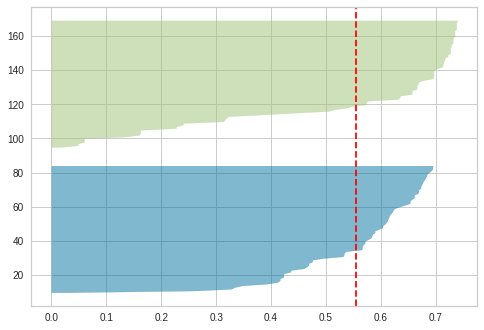


Avg Sihlouette Score:  0.5039558227584355


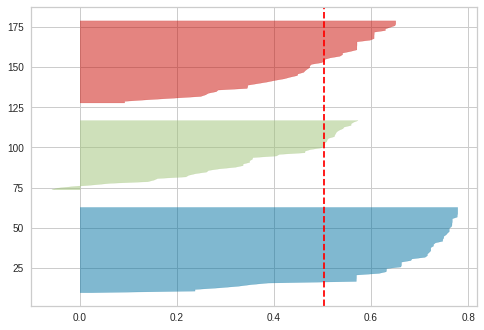


Avg Sihlouette Score:  0.4634141452435154


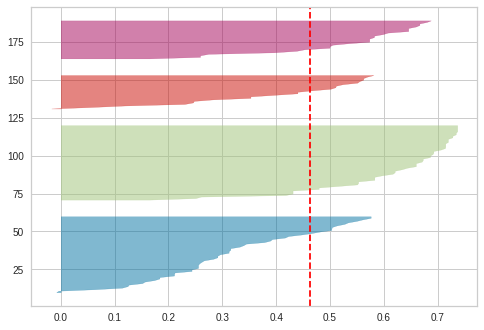


Avg Sihlouette Score:  0.47194733868606115


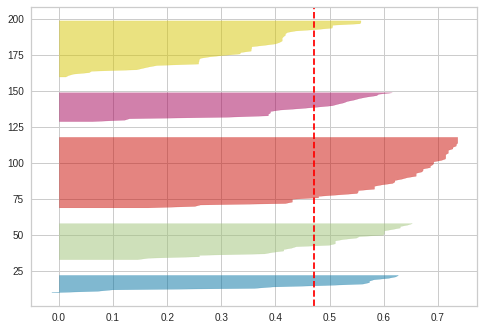


Avg Sihlouette Score:  0.42143603061142


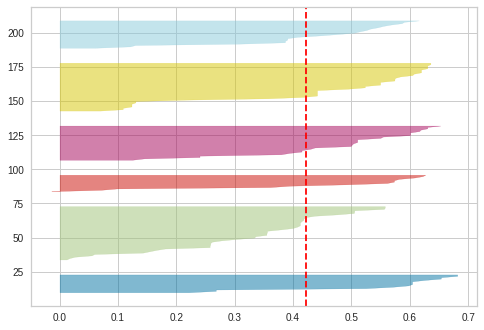

In [32]:
from yellowbrick.cluster import SilhouetteVisualizer

for n in range(2,7):

    model = KMeans(n_clusters=n)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X)
    print('\nAvg Sihlouette Score: ', visualizer.silhouette_score_)
    plt.show()

    


Per valutare quale numero di cluster scegliere, questi plot ci possono dare qualche indicazione. Sono da scartare quei k per i quali:

*   c'è qualche cluster interamente sotto la linea di media
*   i cluster sono popolati molto diversamente
*   le forme dei cluster sono molto diverse
*   ci sono molti score negativi

In [33]:
model = KMeans(n_clusters=3)
model.fit(X)
labels = model.labels_
labels = pd.Series(labels, name='labels')

,sepal length (cm),petal width (cm),labels
0,5.1,0.2,1
1,4.9,0.2,1
2,4.7,0.2,1
3,4.6,0.2,1
4,5.0,0.2,1
...,...,...,...
145,6.7,2.3,0
146,6.3,1.9,0
147,6.5,2.0,0
148,6.2,2.3,0


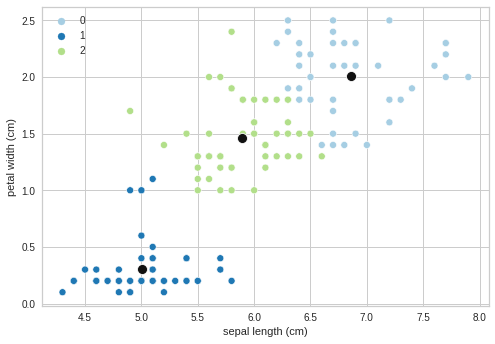

In [34]:
labels_df = X.join(labels)
display(labels_df)

sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', hue='labels', data=labels_df, palette='Paired')
sns.scatterplot(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], color='k', s=100)
plt.show()

## CLASSIFICATION METRICS (solo se abbiamo i target, cioè mai nella realtà)

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Per confronto con classi vere:

In [36]:
y = pd.Series(iris.target, index=X.index, name='targets')
target_df = X.join(y)

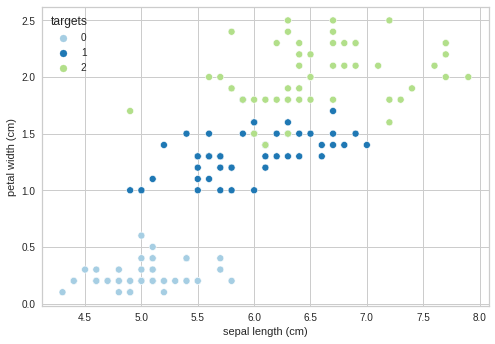

In [37]:
sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', hue='targets', data=target_df, palette='Paired')
plt.show()

In [45]:
labels = model.labels_
labels = pd.Series(labels, name='labels')

In [46]:
y = y.replace({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]})
labels = labels.replace({0:iris.target_names[1], 1:iris.target_names[0], 2:iris.target_names[2]})

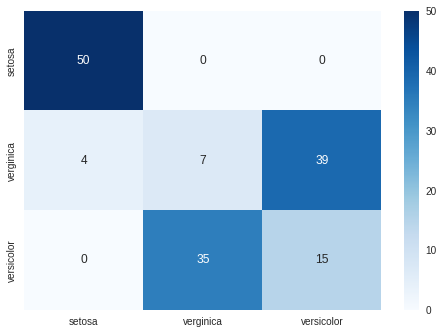

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y, labels)
labels = ['setosa','verginica','versicolor']
sns.heatmap(cm, xticklabels=labels, yticklabels=labels, annot=True, fmt=".0f", cmap='Blues');

#CON TUTTE LE FEATURES

In [48]:
iris = datasets.load_iris()

In [49]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [50]:
targets = pd.Series(iris.target, name='targets')

In [51]:
targets = targets.replace({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]})

In [52]:
df_with_targets = df.join(targets)
display(df_with_targets)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targets
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [53]:
X = df[['sepal length (cm)', 'petal width (cm)',"petal length (cm)","sepal width (cm)"]].copy()

In [54]:
from sklearn.cluster import KMeans

model = KMeans(random_state=22)
model.fit(X)

KMeans(random_state=22)

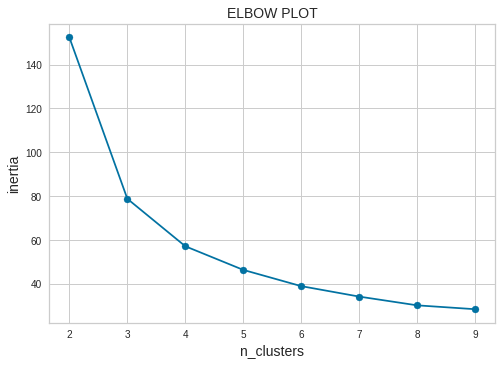

In [55]:
#si plotta l'inerzia per  ogni valore di k , per scegliere il valore migliore
inertia_list = list()
for n in range(2, 10):
    model = KMeans(n_clusters=n)
    model.fit(X)
    inertia_list += [model.inertia_]

plt.scatter(range(2, 10), inertia_list)
plt.plot(range(2, 10), inertia_list)
plt.title('ELBOW PLOT', fontsize=14)
plt.xlabel('n_clusters', fontsize=14)
plt.ylabel('inertia', fontsize=14)
plt.show()


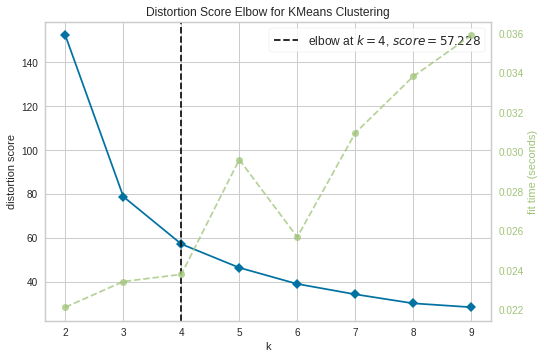

In [63]:
from yellowbrick.cluster import KElbowVisualizer #comando dper fare direttamente l'elbow plot

visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [57]:
from sklearn.metrics import silhouette_score

for n in range(2,7):

    model = KMeans(n_clusters=n)
    model.fit(X)
    labels = model.labels_
    print('Avg Sihlouette Score (k={}): {} '.format(n,silhouette_score(X, labels)))

Avg Sihlouette Score (k=2): 0.6810461692117461 
Avg Sihlouette Score (k=3): 0.5528190123564093 
Avg Sihlouette Score (k=4): 0.498050504997287 
Avg Sihlouette Score (k=5): 0.4887488870931054 
Avg Sihlouette Score (k=6): 0.3678464984712237 



Avg Sihlouette Score:  0.6810461692117461


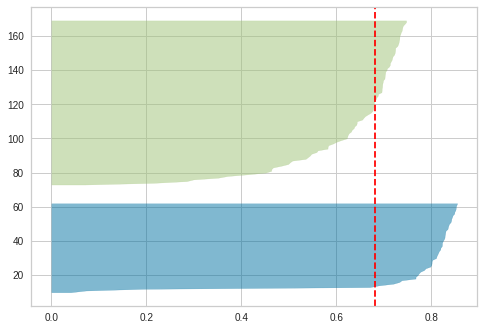


Avg Sihlouette Score:  0.5528190123564093


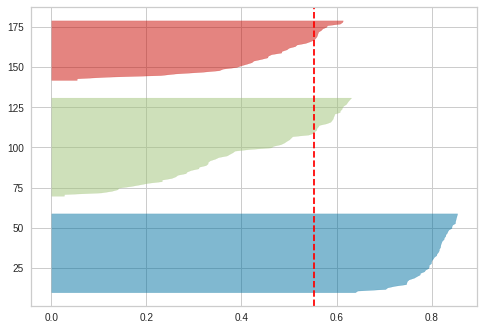


Avg Sihlouette Score:  0.4972176648710973


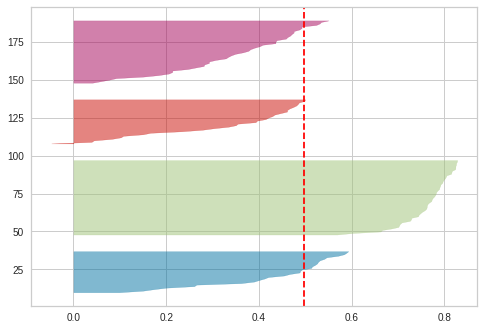


Avg Sihlouette Score:  0.4887488870931054


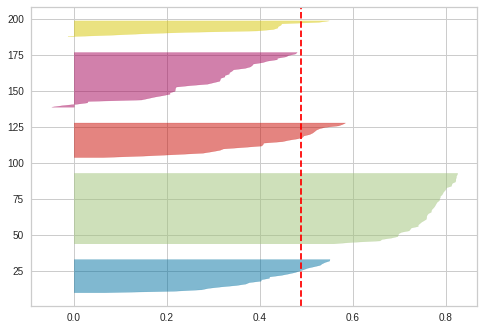


Avg Sihlouette Score:  0.36483400396700194


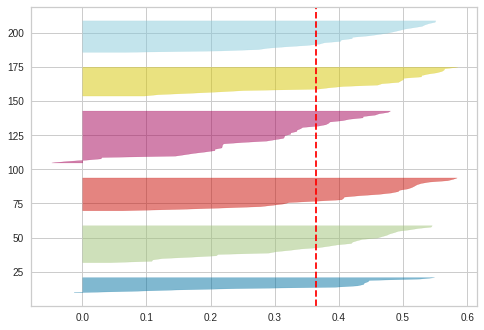

In [58]:
from yellowbrick.cluster import SilhouetteVisualizer

for n in range(2,7):

    model = KMeans(n_clusters=n)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X)
    print('\nAvg Sihlouette Score: ', visualizer.silhouette_score_)
    plt.show()


In [59]:
model = KMeans(n_clusters=3)
model.fit(X)
labels = model.labels_
labels = pd.Series(labels, name='labels')

In [66]:
labels = model.labels_
labels = pd.Series(labels, name='labels')

In [61]:
y = y.replace({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]})
labels = labels.replace({0:iris.target_names[1], 1:iris.target_names[0], 2:iris.target_names[2]})

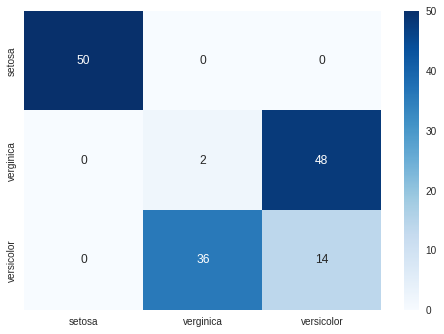

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y, labels)
labels = ['setosa','verginica','versicolor']
sns.heatmap(cm, xticklabels=labels, yticklabels=labels, annot=True, fmt=".0f", cmap='Blues');

In [68]:
model = KMeans(n_clusters=3,random_state=22)
model.fit(X)

KMeans(n_clusters=3, random_state=22)

In [69]:
labels = pd.Series(model.labels_, index=X.index,name='labels')

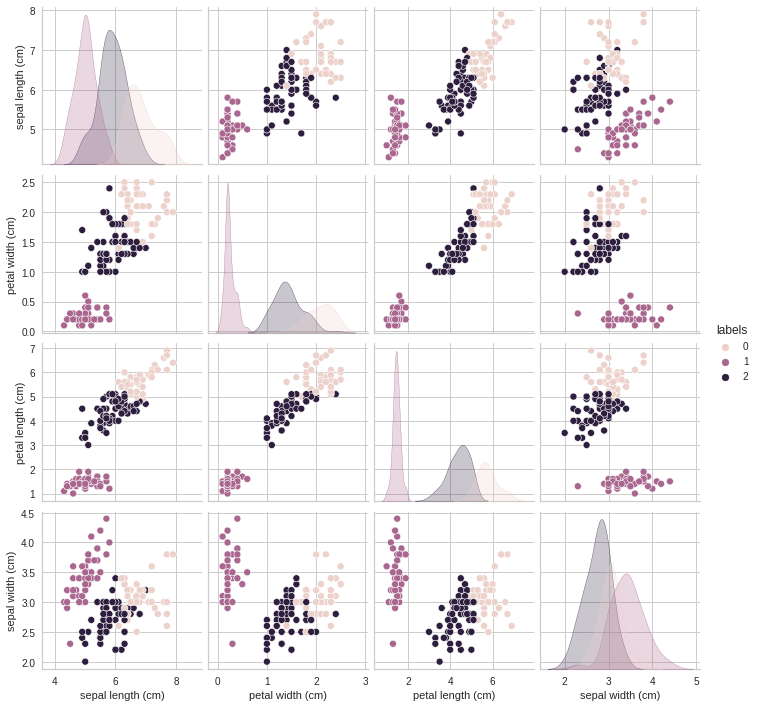

In [72]:
#hue colora i dati a seconda della colonna
labels_df =X.join(labels).copy()
sns.pairplot(labels_df, hue='labels')
plt.show()